In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # needed to make the plotly.express show on github
from internproject.constants import ROOT_DATA_DIR

In [2]:
rETH_wstETH_apr_df = pd.read_csv(
    ROOT_DATA_DIR
    / "daily_snapshots/0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A_apr_df.csv",
    index_col=0,
    parse_dates=True,
)

rETH_wstETH_apr_df

,block,tokens,balances,lastChangeBlock,rate,lp_token_total_supply,invariant_data,protocol_swap_fee_percent,lastInvariant,amplificationParameter,...,equilibrium_eth_tvl,pool_balance_equilibrium_portion_0,pool_balance_equilibrium_portion_1,lp_token_equilibrium_eth_value,lp_token_discount_percent,raw_base_apr,raw_fee_apr,raw_incentive_apr,raw_price_apr,pool_address
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02,NaN,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A
2022-01-03,NaN,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A
2022-01-04,NaN,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A
2022-01-05,NaN,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A
2022-01-06,NaN,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,17346692.0,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",['897918751108788633568' '651819886342488285363'],17346660.0,1.006330e+18,1584.693429,['1594645370161765439210' '50000'],0.5,1594645370161765439210,50000.0,...,1595.265086,0.591403,0.408597,1.006671,-0.669506,1.360948,3.080661,10.365338,0.669506,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A
2023-05-28,17353818.0,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",['905910690950347526748' '634490098381308415365'],17349913.0,1.006332e+18,1575.744374,['1585684188153586751220' '50000'],0.5,1585684188153586751220,50000.0,...,1586.430975,0.600052,0.399948,1.006782,-0.621418,1.371544,0.000000,16.955373,0.621418,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A
2023-05-29,17360948.0,"['0x9559Aaa82d9649C7A7b220E7c461d2E74c9a3593',...",['899137370440736399246' '596400536503045764896'],17354391.0,1.006348e+18,1530.694047,['1540408568826080331598' '50000'],0.5,1540408568826080331598,50000.0,...,1541.328968,0.613061,0.386939,1.006948,-0.580836,1.300521,0.000000,17.518984,0.580836,0xB08885e6026bab4333A80024Ec25a1a3e1FF2b8A


In [3]:
rETH_wstETH_apr_df.columns

Index(['block', 'tokens', 'balances', 'lastChangeBlock', 'rate',
       'lp_token_total_supply', 'invariant_data', 'protocol_swap_fee_percent',
       'lastInvariant', 'amplificationParameter', 'unscaled_invariant',
       'delta', 'scaled_invariant', 'lp_token_virtual_price', 'pool_balance_0',
       'pool_balance_1', 'pool_balance_market_0', 'pool_balance_market_1',
       'market_eth_tvl', 'pool_balance_market_portion_0',
       'pool_balance_market_portion_1', 'lp_token_market_eth_value',
       'pool_balance_equilibrium_0', 'pool_balance_equilibrium_1',
       'equilibrium_eth_tvl', 'pool_balance_equilibrium_portion_0',
       'pool_balance_equilibrium_portion_1', 'lp_token_equilibrium_eth_value',
       'lp_token_discount_percent', 'raw_base_apr', 'raw_fee_apr',
       'raw_incentive_apr', 'raw_price_apr', 'pool_address'],
      dtype='object')

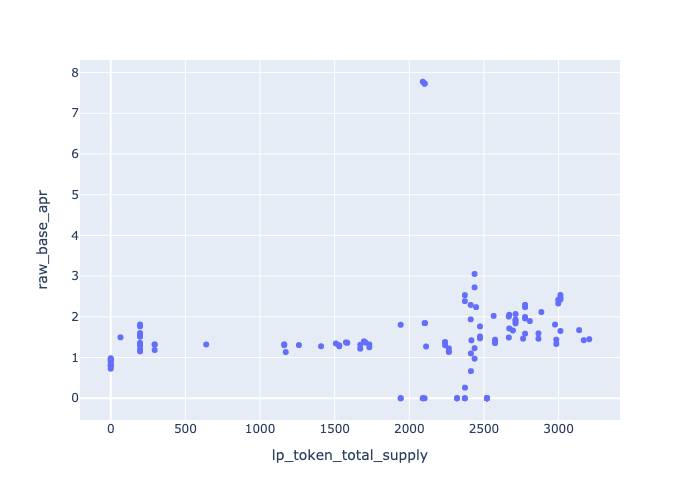

In [4]:
px.scatter(rETH_wstETH_apr_df, x='lp_token_total_supply', y='raw_base_apr')
# raw base apr vs quantity of coins 

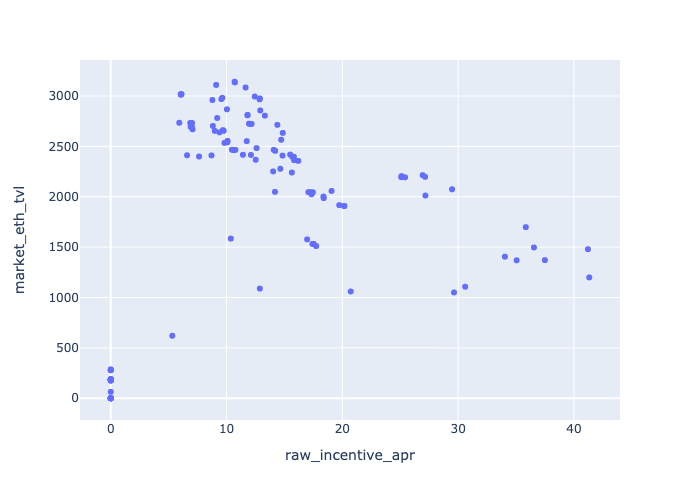

In [5]:
px.scatter(rETH_wstETH_apr_df, y='market_eth_tvl', x='raw_incentive_apr')

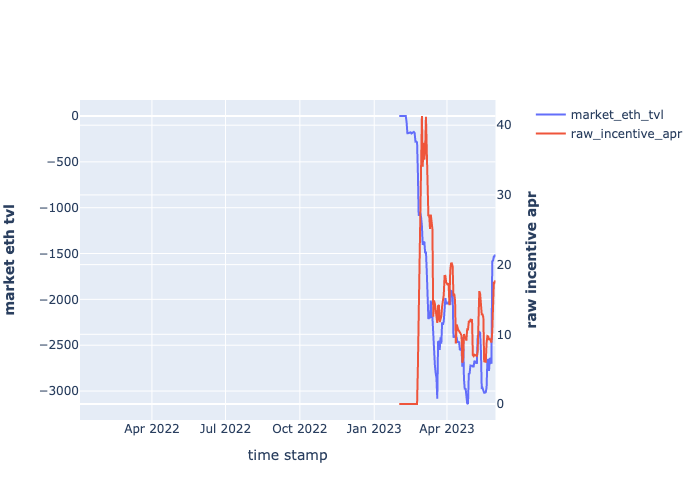

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=rETH_wstETH_apr_df.index, y=-rETH_wstETH_apr_df['market_eth_tvl'], name='market_eth_tvl'), 
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=rETH_wstETH_apr_df.index, y=rETH_wstETH_apr_df['raw_incentive_apr'], name='raw_incentive_apr'), 
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="time stamp")

# Set y-axes titles
fig.update_yaxes(title_text="<b>market eth tvl</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>raw incentive apr</b>", secondary_y=True)

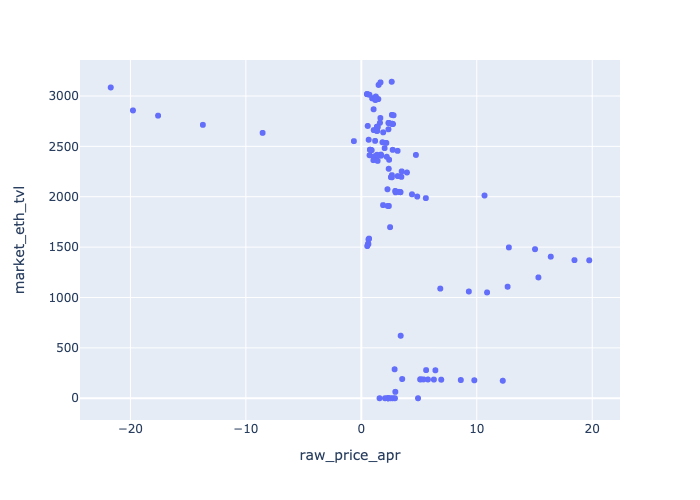

In [7]:
px.scatter(rETH_wstETH_apr_df, x='raw_price_apr', y='market_eth_tvl')

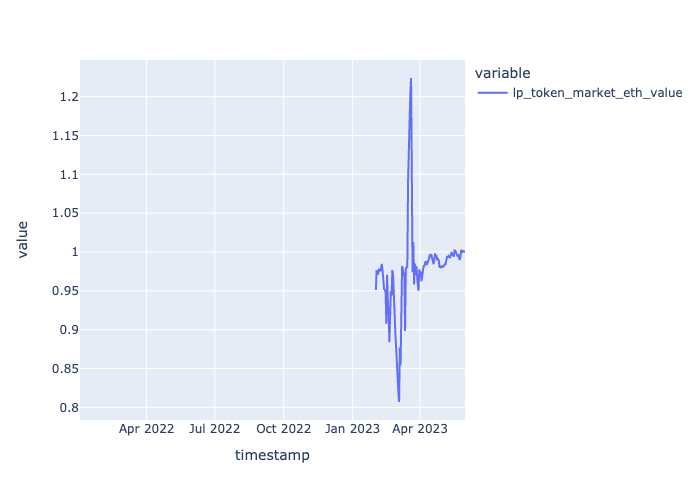

In [8]:
px.line(rETH_wstETH_apr_df['lp_token_market_eth_value'])